# Asteroseismology of $\zeta$ Ophiuchi
author:  [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [12]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *


In [13]:
set_plotDefaults()

done in plotDefaults.py


In [14]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
binary = folder+"/binary_to_postRLOF/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

re-run\_exponential


In [40]:
def get_lamb_S(pfile):
    """ calculate the lamb frequency for l=1 modes """
    src, col = getSrcCol(pfile)
    csound = src[:, col.index("csound")] # cm/s
    r = np.log10(10.**(src[:, col.index("logR")])*Rsun_cm) # cm
    lamb_S = np.sqrt(2)*csound/r
    return lamb_S

367488.68833292706 15042917.085708546


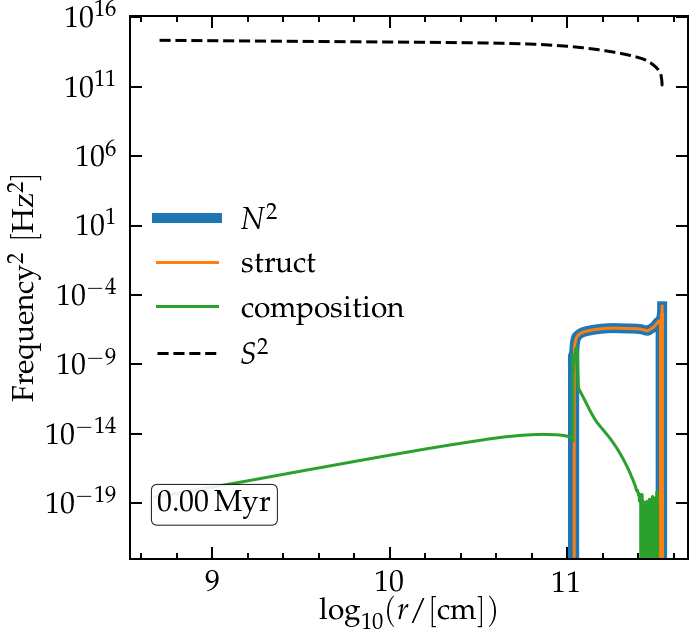

In [44]:
def propagation_plot(pfile, ax="", legend=True):
    """ make a propagation plot for waves in stars """
    if ax == "":
        fig = plt.figure(figsize=(10,10))
        gs = gridspec.GridSpec(100, 100)
        ax = fig.add_subplot(gs[:, :])
    age = get_age_from_profile(pfile)
    timestamp = f"${age:.6f}"+r"\,\mathrm{Myr}$"
    
    src, col = getSrcCol(pfile)
    N2 = src[:, col.index("brunt_N2")]
    brunt_N2_structure_term = src[:, col.index("brunt_N2_structure_term")]
    brunt_N2_composition_term = src[:, col.index("brunt_N2_composition_term")]
    brunt_A = src[:, col.index("brunt_A")]
    brunt_A_div_x2 = src[:, col.index("brunt_A_div_x2")]
    brunt_B = src[:, col.index("brunt_B")]
    brunt_nonB = src[:, col.index("brunt_nonB")]
    log_brunt_B = src[:, col.index("log_brunt_B")]
    log_brunt_nonB = src[:, col.index("log_brunt_nonB")]
    r = np.log10(10.**(src[:, col.index("logR")])*Rsun_cm)
    # g-modes
    ax.plot(r, N2,lw=10, label="$N^2$")     
    ax.plot(r, brunt_N2_structure_term, label="$\mathrm{struct}$")
    ax.plot(r, brunt_N2_composition_term, label="$\mathrm{composition}$")
    # p-modes
    S = get_lamb_S(pfile)
    S2 = S*S
    print(min(S), max(S))
    ax.plot(r, S2,lw=3,ls='--', c='k', label="$S^2$")    
    ax.set_yscale('log')
    ax.set_xlabel(r"$\log_{10}(r/ \mathrm{[cm]})$")
    ax.set_ylabel(r"$\mathrm{Frequency^2\ [Hz^2]}$")
    age = get_age_from_profile(pfile)
    timestamp = f"${age:.2f}"+r"\,\mathrm{Myr}$"
    ax.text(0.05,0.1, timestamp, fontsize=30, va="center",
            transform=ax.transAxes, bbox=dict(facecolor='w',
                                              edgecolor='black', boxstyle='round,pad=0.2', alpha=0.9))   
    if legend:
        ax.legend()
# test
propagation_plot(profiles[-1])

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


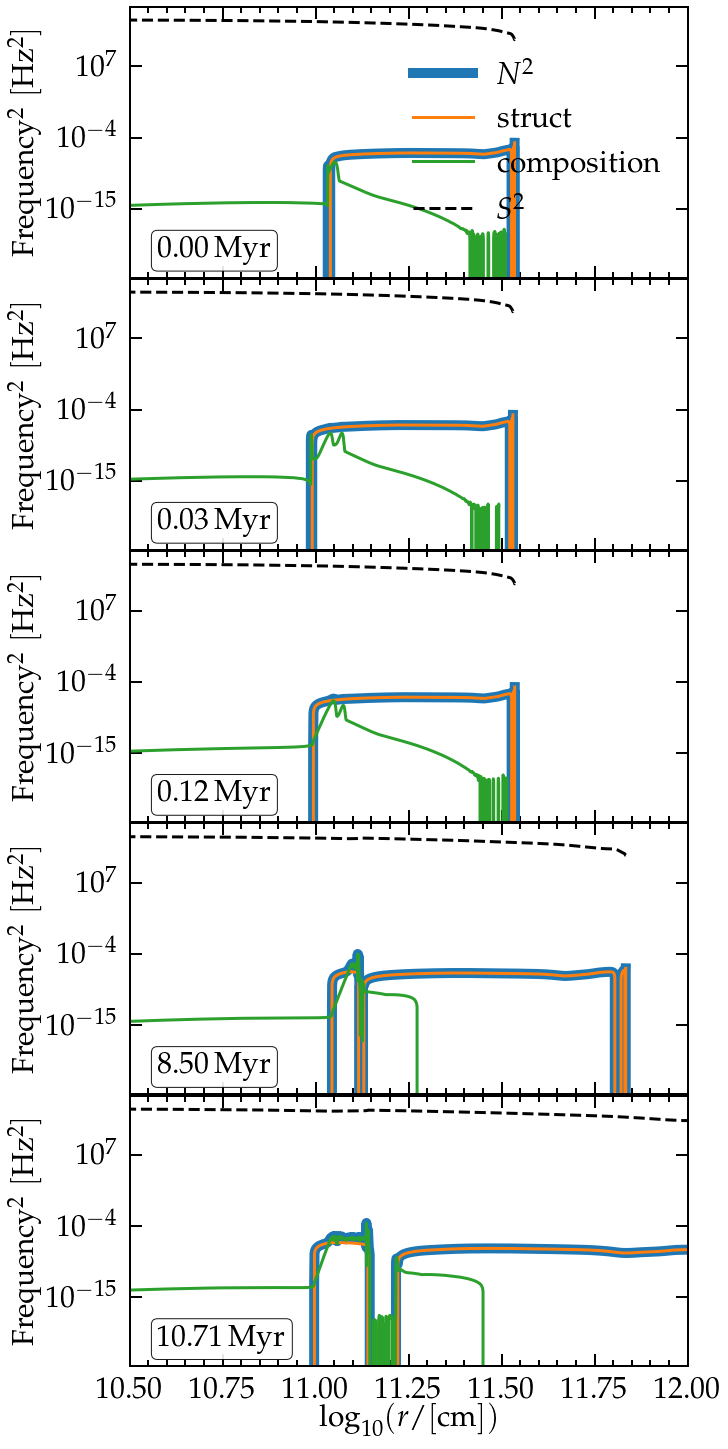

In [42]:
fig = plt.figure(figsize=(10,25))
gs = gridspec.GridSpec(150, 100)
ax5 = fig.add_subplot(gs[:30, :])
ax4 = fig.add_subplot(gs[30:60, :])
ax3 = fig.add_subplot(gs[60:90, :])
ax2 = fig.add_subplot(gs[90:120, :])
ax1 = fig.add_subplot(gs[120:, :])

axes = [ax1, ax2, ax3, ax4, ax5]

root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"

LOGS = root+"binary_to_postRLOF/LOGS2/"
LOGS_single = root+"accretor_to_TAMS/LOGS/" 

profiles =  [LOGS+"profile10.data",
             LOGS+"profile78.data",
             LOGS+"profile131.data",
             LOGS_single+"profile496.data",
             LOGS_single+"profile893.data"]

# revert order to get from top to bottom
profiles = profiles[::-1]

for pfile in profiles:
    legend = False
    ax_to_use = axes[profiles.index(pfile)]
    if ax_to_use == ax5:
        legend = True
    propagation_plot(pfile, ax=ax_to_use, legend=legend)    


ax1.set_xlabel(r"$\log_{10}(r/ \mathrm{[cm]})$")
# ax1.set_ylim(10**1, 10**18)
ax1.set_xlim(10.5,12)
# ax3.set_ylabel(r"$\log_{10}(D / \mathrm{[cm^2\ s^{-1}]})$")
for ax in axes:
    if ax != ax1:
        ax.set_xticklabels([])
    ax.set_ylim(ax1.get_ylim())
    ax.set_xlim(10.5,12)
    ax.set_ylabel(r"$\mathrm{Frequency^2\ [Hz^2]}$")
    # ax.set_yticks([100, 1000, 1e4, 1e5, 1e6, 1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14, 1e15, 1e16,1e17], minor=True)
    # ax.set_yticklabels([], minor=True)

# plt.savefig('/mnt/home/mrenzo/TMP/frequencies_zoom.png')
    